<a href="https://colab.research.google.com/github/SaurabhAradwad/NYC-Trip-Time-Prediction-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

#### **Data Summary**

Column  | Description
------- | -------
**id** | a unique identifier for each trip  
**vendor_id** | a code indicating the provider associated with the trip record  
**pickup_datetime** | date and time when the meter was engaged  
**dropoff_datetime** | date and time when the meter was disengaged  
**passenger_count** | the number of passengers in the vehicle (driver entered value)  
**pickup_longitude** | the longitude where the meter was engaged  
**pickup_latitude** | the latitude where the meter was engaged  
**dropoff_longitude** | the longitude where the meter was disengaged  
**dropoff_latitude** | the latitude where the meter was disengaged  
**store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)  
**trip_duration** | duration of the trip in seconds  

#<b> 01 Connect To gitHub and Google drive

In [ ]:
# Cloning gitHub Repo to colab for csv file connection

!git clone https://github.com/SaurabhAradwad/Superwised-ML-Regression-Project

Cloning into 'Superwised-ML-Regression-Project'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
# Mounting google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

#<b> 02 Installation 🧰 and Importing Libraries 📘




In [ ]:
# Install DataPrep library
 
!pip install -U dataprep

In [ ]:
# Import essential libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import datetime as dt
import warnings; warnings.simplefilter('ignore')


#<b> 03 Import CSV 📁 dataset as 🐼 DataFrame and 🔍 Inspection

##<b> Import CSV from drive

In [ ]:
# Importing csv dataset as DataFrame using Pandas Read CSV function
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Folder/02 Superwised ML Regression/NYC Taxi Data.csv')

NameError: ignored

##<b> Data Inspection

In [ ]:
# Checking Head
df.head()

NameError: ignored

In [ ]:
# Checking Tail
df.tail()

In [ ]:
# Checking basic info
df.info()

In [ ]:
# Checking default data summary using describe method and including non numerical features
df.describe(include= 'all')

In [ ]:
# Count unique values each columns
df.nunique()

In [ ]:
# Checking number of rows and columns in our dataset.

print("Number of rows in dataset are:", df.shape[0])
print("Number of columns in dataset are:", df.shape[1])

In [ ]:
# Now let's consider each column in dataset as feture in our dataset.
df.columns

#<b> 04 EDA 🔍 on NYC Taxi dataset

### Let's do some **Exploratary Data Analysis** on given dataset using **DataPrep.**

In [ ]:
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing
from dataprep.datasets import load_dataset

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)


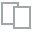
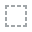
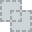
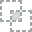
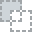
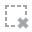
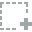
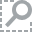
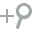
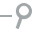
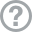
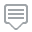
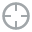
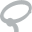
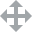
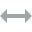
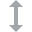
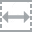
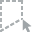
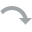
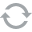
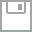
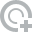
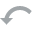
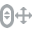
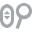
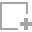
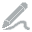
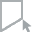
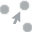
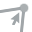
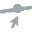

In [ ]:
plot_missing(df)


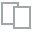
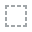
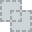
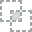
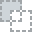
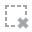
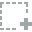
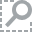
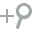
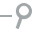
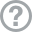
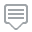
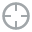
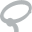
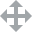
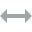
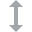
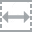
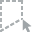
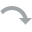
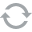
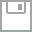
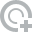
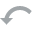
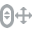
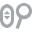
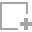
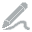
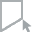
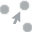
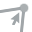
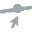

In [ ]:
plot(df)

#<b> 05  Feature Creation
#### Let us extract **pickup_datetime** and **dropoff_datetimeand** to create some new features using pandas datetime.

In [ ]:
# Changing 'object' type of pickup_datetime, dropoff_datetime. Converting it into 'datetime' type.
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
# It will contain the day number instead of characters with Monday=0 to Sunday=6.
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

# It will convert weekday into number start at Monday=0 and end at Sunday=6.
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

# Extract hour only from pickup_datetime.
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

# Extract month in number only from pickup_datetime with January=1
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

##<b> Newly added Features are 
* pickup_day 
* dropoff_day
* pickup_day_no
* dropoff_day_no
* pickup_hour
* dropoff_hour
* pickup_month
* dropoff_month

##### We will start with **pickup_day** & **dropoff_day** , they contains the name of the day on which the ride was taken as **Monday=0** to **Sunday=6**.

##### **pickup_day_no** & **dropoff_day_no** , they contain the day number instead of characters with **Monday=0** and **Sunday=6**

##### **pickup_hour** & **dropoff_hour** , they contain an hour of the day in the **24-hour format**.

##### **pickup_month** & **dropoff_month** , they contain the month number with **January=1** ..... **June=06** till  **December=12**.






During dataset research, we found that the **pickup_longitude**,     **pickup_latitude**, **dropoff_longitude** & **dropoff_latitude** have coordinates in the form of longitude and latitude. But from it, we really can't infer anything or come to any conclusions.

Therefore, **distance** is the most obvious feature we can draw from this. Let's carry it out.

###**Lets Importing the geopy.distance library which will help us calculate distance from geographical coordinates**.

In [ ]:
#Function aiming at calculating distances from coordinates
def ft_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

#Add distance feature
df['distance'] = ft_haversine_distance(df['pickup_latitude'].values,
                                                 df['pickup_longitude'].values, 
                                                 df['dropoff_latitude'].values,
                                                 df['dropoff_longitude'].values)

'''test['distance'] = ft_haversine_distance(test['pickup_latitude'].values, 
                                                test['pickup_longitude'].values, 
                                                test['dropoff_latitude'].values, 
                                                test['dropoff_longitude'].values)'''

"test['distance'] = ft_haversine_distance(test['pickup_latitude'].values, \n                                                test['pickup_longitude'].values, \n                                                test['dropoff_latitude'].values, \n                                                test['dropoff_longitude'].values)"

In [ ]:
#Function aiming at calculating the direction
def ft_degree(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371 #km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

#Add direction feature
df['direction'] = ft_degree(df['pickup_latitude'].values,
                                df['pickup_longitude'].values,
                                df['dropoff_latitude'].values,
                                df['dropoff_longitude'].values)
'''test['direction'] = ft_degree(test['pickup_latitude'].values,
                                  test['pickup_longitude'].values, 
                                  test['dropoff_latitude'].values,
                                  test['dropoff_longitude'].values)'''

"test['direction'] = ft_degree(test['pickup_latitude'].values,\n                                  test['pickup_longitude'].values, \n                                  test['dropoff_latitude'].values,\n                                  test['dropoff_longitude'].values)"

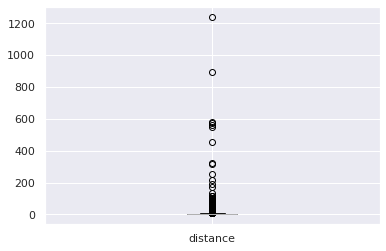

In [ ]:
#Visualize distance outliers
df.boxplot(column='distance', return_type='axes');

In [ ]:
#Remove distance outliers
df = df[(df.distance < 200)]

In [ ]:
#Create speed feature
df['speed'] = (df.distance * 3600) / (df.trip_duration)

In [ ]:
df.head().T

0                    1  \
id                            id2875421            id2377394   
vendor_id                             2                    1   
pickup_datetime     2016-03-14 17:24:55  2016-06-12 00:43:35   
dropoff_datetime    2016-03-14 17:32:30  2016-06-12 00:54:38   
passenger_count                       1                    1   
pickup_longitude             -73.982155           -73.980415   
pickup_latitude               40.767937            40.738564   
dropoff_longitude             -73.96463           -73.999481   
dropoff_latitude              40.765602            40.731152   
store_and_fwd_flag                    N                    N   
trip_duration                       455                  663   
pickup_day                       Monday               Sunday   
dropoff_day                      Monday               Sunday   
pickup_day_no                         0                    6   
dropoff_day_no                        0                    6   
pickup_hour                          17                    0   
dropoff_hour                         17                    0   
pickup_month                          3                    6   
dropoff_month                         3                    6   
distance                       1.498521             1.805507   
direction                     99.970196          -117.153768   
pickup_timeofday                Evening           Late night   
dropoff_timeofday               Evening           Late night   
speed                         11.856428             9.803659   

                                      2                    3  \
id                            id3858529            id3504673   
vendor_id                             2                    2   
pickup_datetime     2016-01-19 11:35:24  2016-04-06 19:32:31   
dropoff_datetime    2016-01-19 12:10:48  2016-04-06 19:39:40   
passenger_count                       1                    1   
pickup_longitude             -73.979027            -74.01004   
pickup_latitude               40.763939            40.719971   
dropoff_longitude            -74.005333           -74.012268   
dropoff_latitude              40.710087            40.706718   
store_and_fwd_flag                    N                    N   
trip_duration                      2124                  429   
pickup_day                      Tuesday            Wednesday   
dropoff_day                     Tuesday            Wednesday   
pickup_day_no                         1                    2   
dropoff_day_no                        1                    2   
pickup_hour                          11                   19   
dropoff_hour                         12                   19   
pickup_month                          1                    4   
dropoff_month                         1                    4   
distance                       6.385098             1.485498   
direction                   -159.680165            -172.7377   
pickup_timeofday                Morning              Evening   
dropoff_timeofday             Afternoon              Evening   
speed                         10.822201            12.465721   

                                      4  
id                            id2181028  
vendor_id                             2  
pickup_datetime     2016-03-26 13:30:55  
dropoff_datetime    2016-03-26 13:38:10  
passenger_count                       1  
pickup_longitude             -73.973053  
pickup_latitude               40.793209  
dropoff_longitude            -73.972923  
dropoff_latitude               40.78252  
store_and_fwd_flag                    N  
trip_duration                       435  
pickup_day                     Saturday  
dropoff_day                    Saturday  
pickup_day_no                         5  
dropoff_day_no                        5  
pickup_hour                          13  
dropoff_hour                         13  
pickup_month                          3  
dropoff_month                         

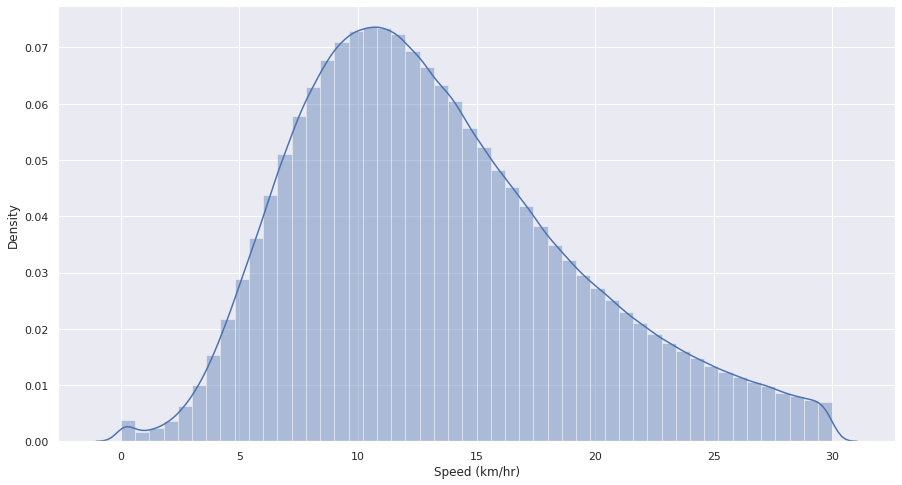

In [ ]:
#Distribution plot of speed (km/hr)
plt.figure(figsize = (15,8))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

In [ ]:
# Remove speed outliers
df = df[(df.speed < 35)]

In [ ]:
# importing geopy library
#from geopy.distance import great_circle

In [ ]:
# Creating the function for calculating distance between pickup and dropoff
'''def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km'''

In [ ]:
# Applying the function to our dataset and creating the feature ‘distance’.
# df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

**Lets Create New Feature Speed(km/Hr) With help of Distance and Duration Column**

In [ ]:
# creating new feature Speed
#df['speed'] = (df.distance*3600/(df.trip_duration))

Next,Lets defined a function that lets us determine what time of the day the ride was taken.

We will create four parts of time:-

1.**Morning** (from 6:00 am to 11:59 pm),

2.**Afternoon** (from 12 noon to 3:59 pm),

3.**Evening** (from 4:00 pm to 9:59 pm), and

4.**Late Night** (from 10:00 pm to 5:59 am)

In [ ]:
#Dividing 24 hours into four parts
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
#Now let us apply this function and create new columns in the dataset.
df['pickup_timeofday'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [ ]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  pickup_day_no dropoff_day_no  \
0         40.765602                  N  ...              0              0   
1         40.731152                  N  ...              6              6   
2         40.710087                  N  ...              1              1   
3         40.706718                  N  ...              2              2   
4         40.782520                  N  ...              5              5   

  pickup_hour  dropoff_hour  pickup_month  dropoff_month  distance  \
0          17            17             3              3  1.498521   
1           0             0             6              6  1.805507   
2          11            12             1              1  6.385098   
3          19            19             4              4  1.485498   
4          13            13             3              3  1.188588   

    direction  pickup_timeofday  dropoff_timeofday  
0   99.970196           Evening            Evening  
1 -117.153768        Late night         Late night  
2 -159.680165           Morning          Afternoon  
3 -172.737700           Evening            Evening  
4  179.473585         Afternoon          Afternoon  

[5 rows x 23 columns]

In [ ]:
#Let us check the data type of all features.
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
distance                     float64
direction                    float64
pickup_timeofday              object
dropoff_timeofday             object
dtype: object

Now our dataset is complete for the further analysis before we train our model with optimal variables.

#<b> 06 Feature Analysis


##<b>Univarate Analysis
The univariate analysis involves studying patterns of all variables individually.

**Target Variable** - **Trip Duration**



Let us start with the target varibale i.e trip duration.

###<b>1.Trip duration.

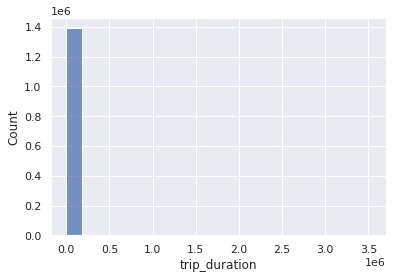

In [ ]:
#Plotting histogram of trip duration 
sns.histplot(df['trip_duration'],kde=False,bins=20)

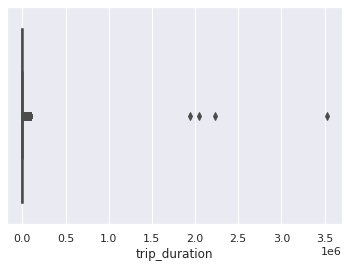

In [ ]:
#Plotting boxplot of trip duration
sns.boxplot(df['trip_duration'])

In [ ]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 250
20 percentile value is 350
30 percentile value is 445
40 percentile value is 544
50 percentile value is 655
60 percentile value is 785
70 percentile value is 949
80 percentile value is 1182
90 percentile value is 1593
100 percentile value is  3526282


In [ ]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1593
91 percentile value is 1661
92 percentile value is 1738
93 percentile value is 1828
94 percentile value is 1937
95 percentile value is 2073
96 percentile value is 2258
97 percentile value is 2514
98 percentile value is 2858
99 percentile value is 3474
100 percentile value is  3526282


In [ ]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 96
2 percentile value is 131
3 percentile value is 154
4 percentile value is 171
5 percentile value is 187
6 percentile value is 201
7 percentile value is 214
8 percentile value is 226
9 percentile value is 238
100 percentile value is  3526282


**We can see that there are some entries  which are significantly different from others. As there are four rows only, let us drop this row.**

In [ ]:
# Setting Trip duration upper limit
nyc_taxi = df[df.trip_duration <= 3400]

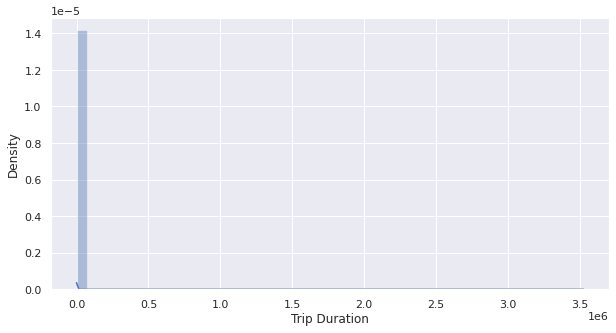

In [ ]:
#distribution plot for trip duration after setting upper limit
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

This distribution shows right skewness, hence let's apply the log10 to transform it to the normal distribution.

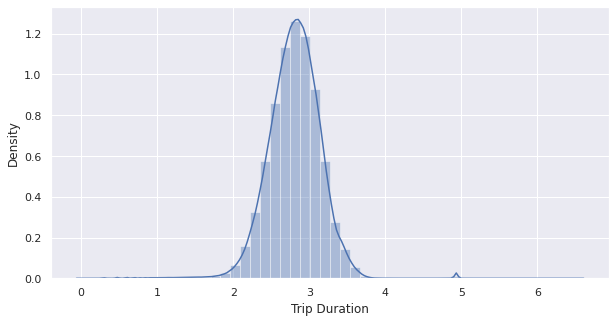

In [ ]:
#distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

* Here, we can see that trip_duration is normally distributed.
* There are some outliers. Lets see the boxplot of this variable.

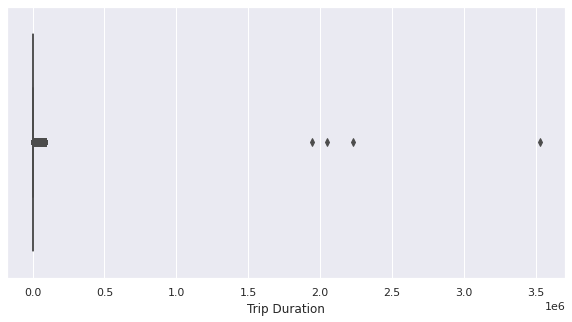

In [ ]:
#Boxplot for trip duration 
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

We can clearly see an outlier and should be removed for the data consistency.

Calclating 0-100th percentille to find a correct percentile value for removal of outliers.

The 90th percentile i.e. 1634 looks reasonable. But, 100th percentile i.e. 3526282 is outlier. Hence removing these would be a better idea.

Let's expand from 90th percentile to 100th percentile as to look further for the 99th percentile.

**Let's visualize the number of trips taken in diifferent slabs of ... secconds respectively**

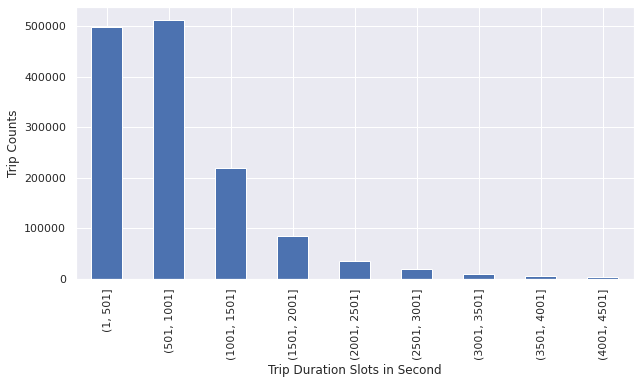

In [ ]:
#lets see the trip count between 1 to 5000 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,5000,500))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

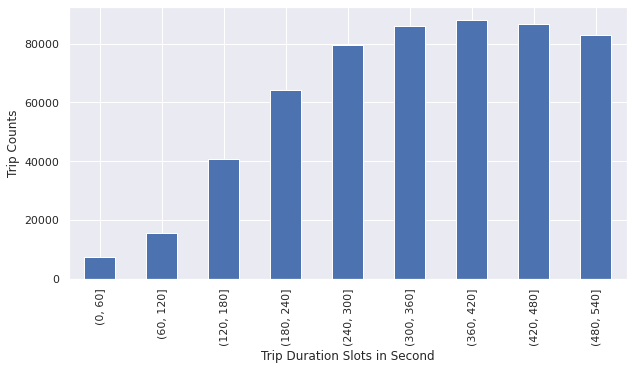

In [ ]:
#lets see the trip count between 1 to 600 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,600,60))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

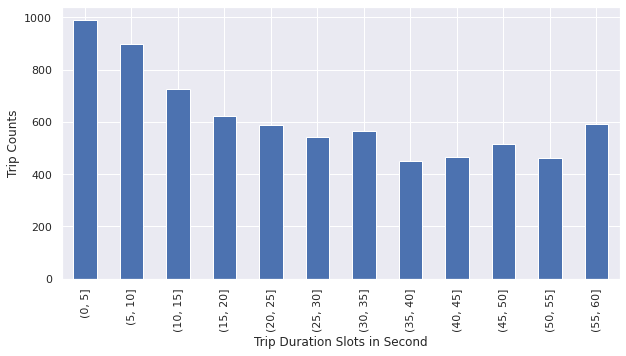

In [ ]:
#lets see the trip count between 1 to 60 sec trip duration
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,61,5))).count().plot(kind='bar')
plt.xlabel('Trip Duration Slots in Second')
plt.ylabel('Trip Counts')
plt.show()

We have seen the 10 largest and smallest value of trip_duration.

We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds i.e. nearly 1 hour.

There are very few trip which have duration greater than 5000 seconds.

There are some durations with as low as 1 second. which points towards trips with 0 km distance.

We should get rid the outliers for the sake of data consistency. (Trip duration greater than 5000 seconds and also trip duration less than 30 seconds)

###<b> 2.Pickup_timeofday & Dropoff_timeofday

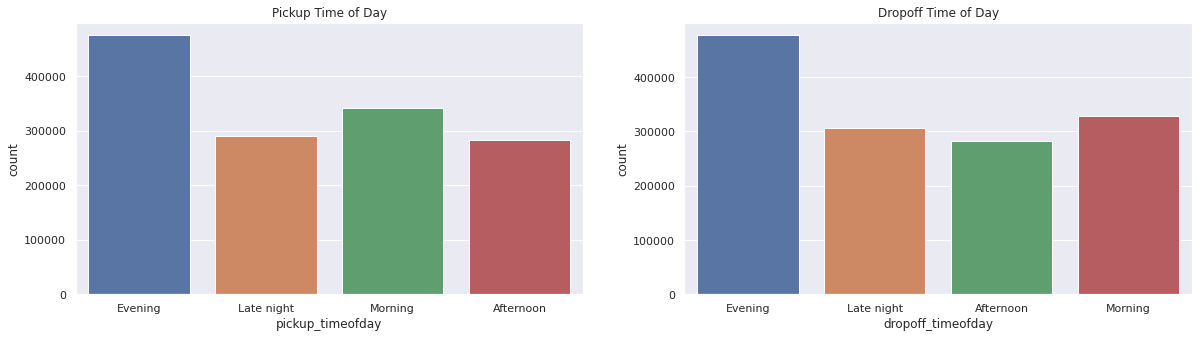

In [ ]:
#lets see pickup and dropoff count at different parts of a day
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=df,ax=ax4)

As we saw above, evenings are the busiest.

### <b>3. Vendor id

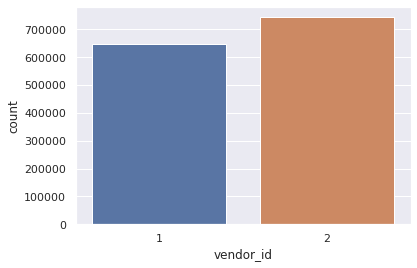

In [ ]:
#lets see which vendor having more trips
sns.countplot(df.vendor_id);

We see that there is not so much difference between the trips taken by both vendors.

### <b>4. Passenger count

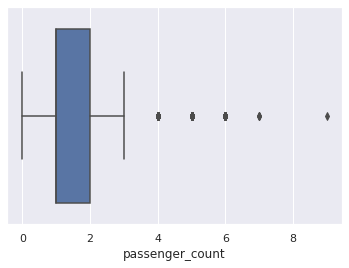

In [ ]:
#plotting boxplot of passenger 
sns.boxplot(df['passenger_count']);

In [ ]:
#explore the passenger count and their numbers of trips 
no_of_passenger = df['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

no_of_passenger  trip_counts
0                1       985205
1                2       200776
2                5        74369
3                3        57356
4                6        46138
5                4        27171
6                0           56
7                7            3
8                9            1

<b>Let us remove the rows which have 0,7,8 and 9 passenger count. We will consider these as outliers.

In [ ]:
# Removing 0 and more than 6 passenger
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count']<=6]

<b> Maximum passenger count per trip is for single passenger.


### <b>5.Store and Forward Flag

In [ ]:
#counting Store and Forward Flag Y & N
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994598
Y    0.005402
Name: store_and_fwd_flag, dtype: float64

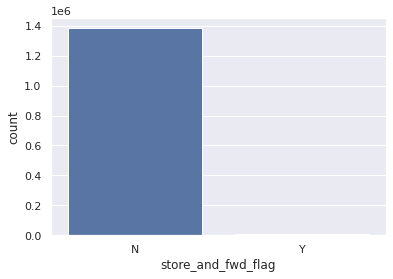

In [ ]:
#barplot of Store and Forward Flag Y & N
sns.countplot(x='store_and_fwd_flag',data=df) ;

* <b> We can see that only about 1% of the trip details were stored in the vehicle memory first before sending it to the server.

### <b>6.Distance

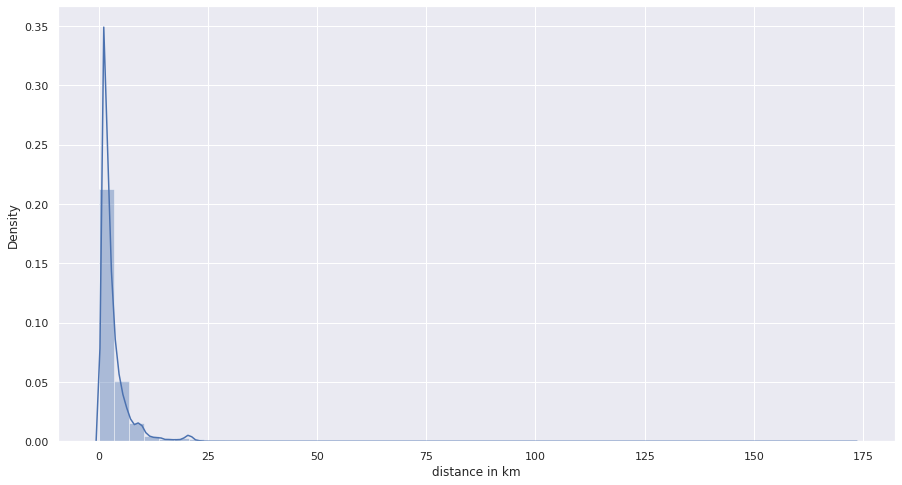

In [ ]:
#distribution plot of distance
plt.figure(figsize = (15,8))
sns.distplot(df['distance'])
plt.xlabel('distance in km')
plt.show()

In [ ]:
# Removing  entries which are having distance less than 50 metere
df = df[df['distance'] > 0.05]

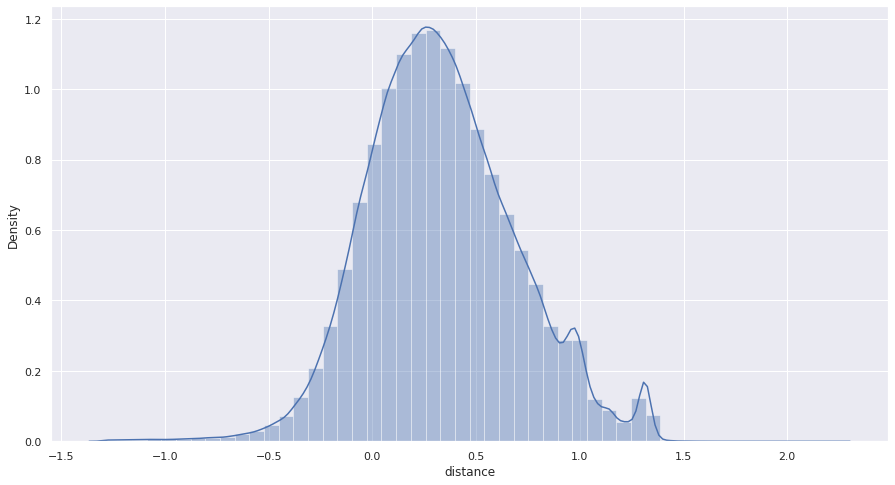

In [ ]:
# Distribution plot of distance that above 50 m with normal bell curve conversion
plt.figure(figsize = (15,8))
sns.distplot(np.log10(df['distance']))
plt.xlabel('distance')
plt.show()

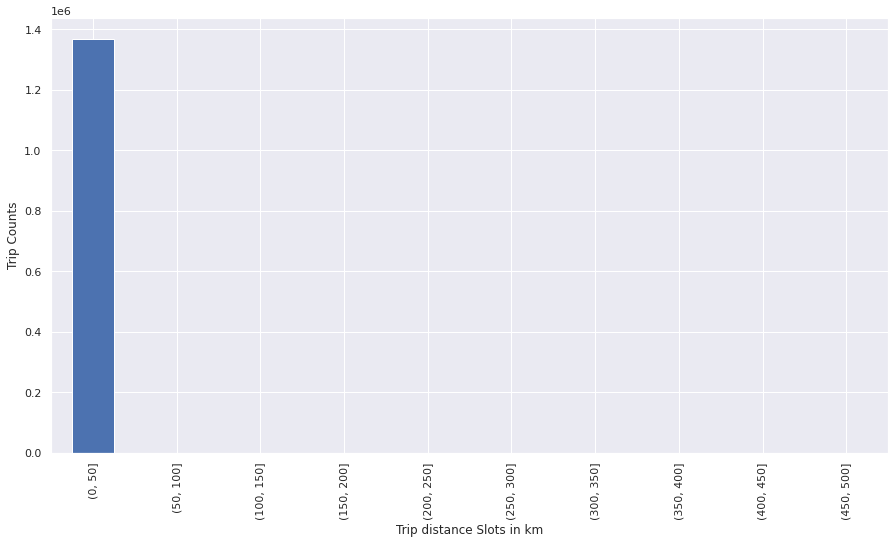

In [ ]:
#Barplot of distance from 0 to 500 km
plt.figure(figsize = (15,8))
nyc_taxi.distance.groupby(pd.cut(nyc_taxi.distance, np.arange(0,501,50))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

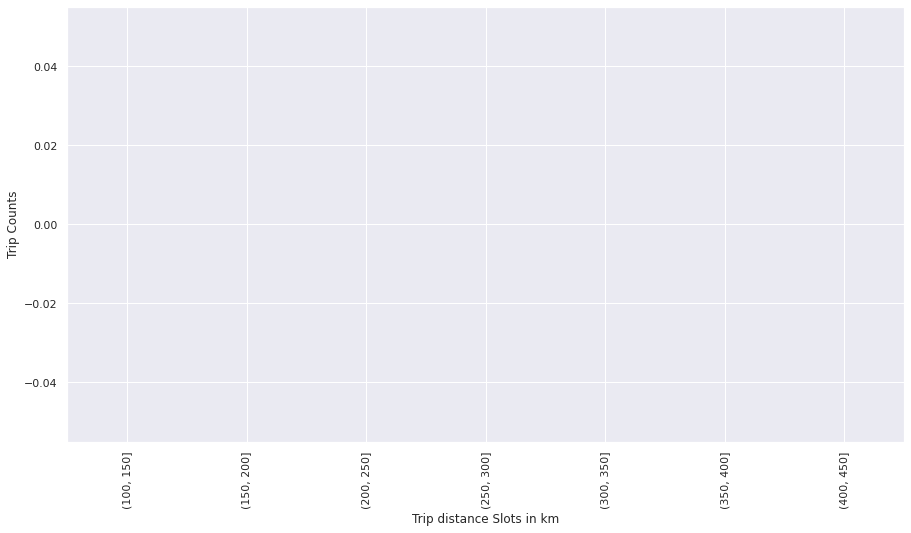

In [ ]:
#Barplot of distance from 100 to 1000 km
plt.figure(figsize = (15,8))
nyc_taxi.distance.groupby(pd.cut(nyc_taxi.distance, np.arange(100,500,50))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

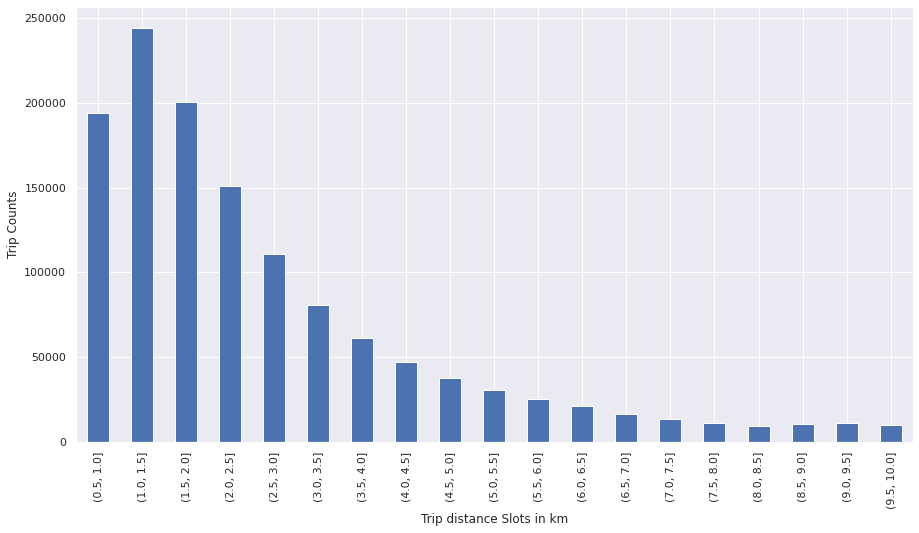

In [ ]:
#Barplot of distance from 0 to 10 km
plt.figure(figsize = (15,8))
df.distance.groupby(pd.cut(df.distance, np.arange(0.5,10.1,0.5))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

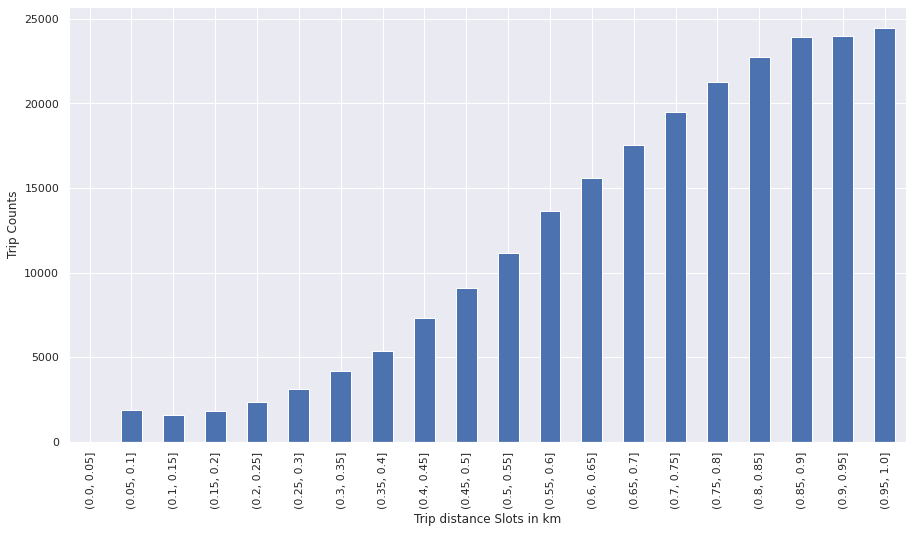

In [ ]:
#Barplot of distance from 0 to 1 km
plt.figure(figsize = (15,8))
df.distance.groupby(pd.cut(df.distance, np.arange(0,1.05,0.05))).count().plot(kind='bar')
plt.xlabel('Trip distance Slots in km')
plt.ylabel('Trip Counts')
plt.show()

In [ ]:
#Removing the rows which are having distance More than 100 km
df = df[df['distance'] <= 100]

In [ ]:
df.distance.max()

76.75657470618805

* There are **16 trips with more than 100 km** distance.
* There are **5887 trips with 0 km** distance. so this trip will unneccsary infuence our model that we are droping this rows

**The possible reasons for 0 km trips can be:**

* The dropoff location couldn’t be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The passengers or driver cancelled the trip due to some issue.
* Due to some technical issue in software, etc.

### <b>7.Speed

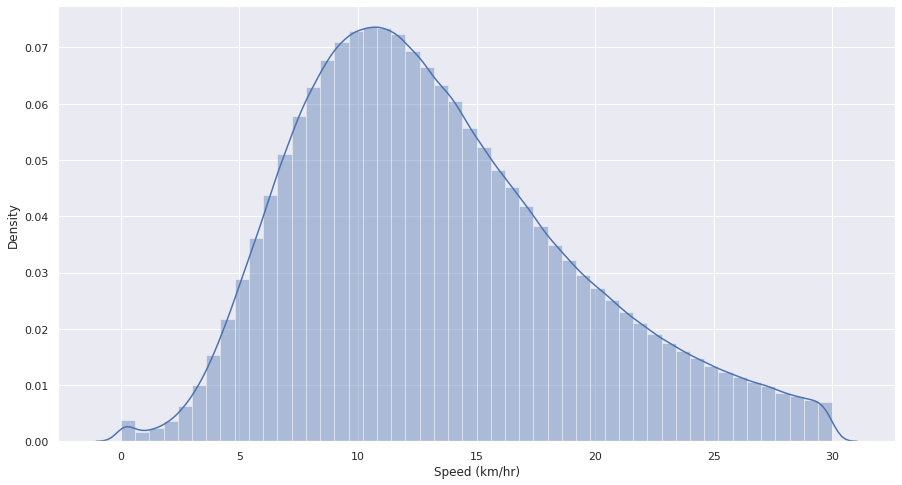

In [ ]:
#Distribution plot of speed (km/hr)
plt.figure(figsize = (15,8))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

In [ ]:
#Maximum speed of the car
df.speed.max()

29.99992444060047

So At Some Places Speed of the taxi is quite high its from **200 to 9274** So which is unresonble.

1. So it may be because of Some pasemger they might have canceled trip in between on  the way after traveling some distance.
2. The dropoff location couldn’t be tracked.
3. The passengers or driver cancelled the trip due to some issue.
4. Due to some technical issue in software, etc.

so in order to have consitant data **lets drop the rows which have speed more than 50 km/hr.** 

In [ ]:
df = df[df['speed']<=50]
df = df[df['speed']>=5]

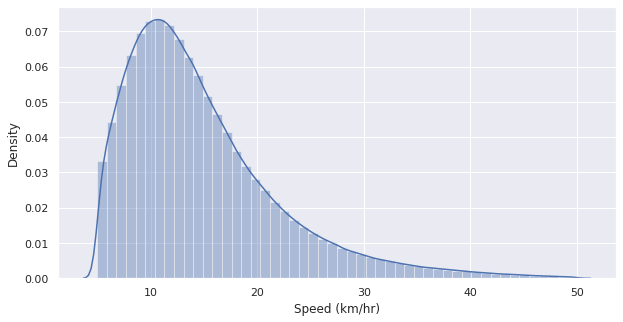

In [ ]:
#Distribution plot after setting the range of speed (5 to 80 km/hr)
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

There are trips that were done at a speed of over 100 km/h.

As per the rule in NYC, the speed limit is 25 mph(approx. 40km/h) in New York City.

 **Mostly trips are done at a speed range of 5-25 km/hr.**

### <b>8.Pickup_hour & Dropup_hour

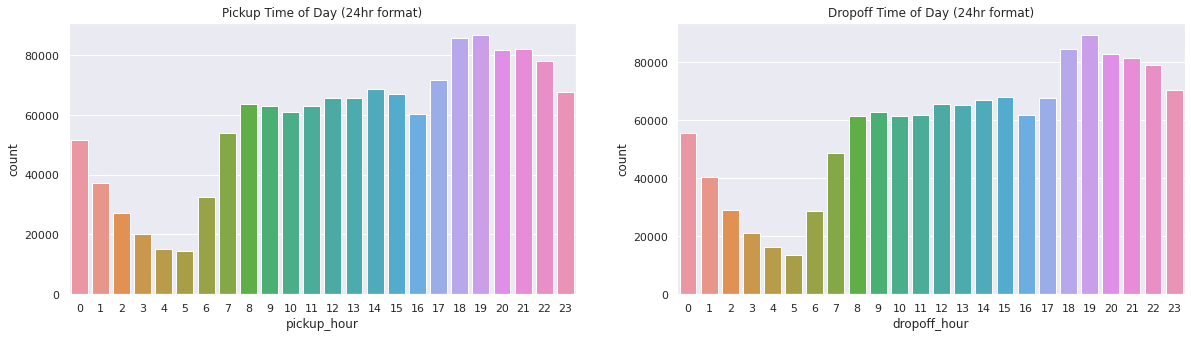

In [ ]:
#lets see pickup and dropoff count each hours of a day
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day (24hr format)')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax3)
ax4.set_title('Dropoff Time of Day (24hr format)')
ax=sns.countplot(x="dropoff_hour",data=df,ax=ax4)

We see the busiest hours are 6:00 pm to 7:00 pm which makes sense as this is the time for people to return home from work.

### <b> 9. Pickup_day & Dropup_day

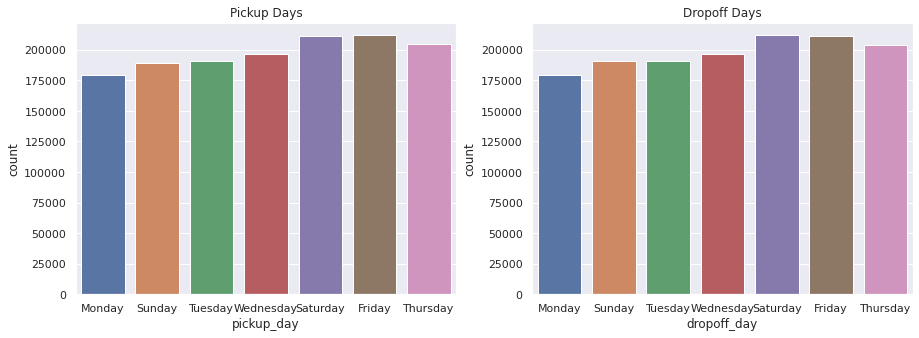

In [ ]:
#lets see pickup and dropoff count days wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=df,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=df,ax=ax2)

We see Fridays are the busiest days followed by Saturdays. That is probably because it’s weekend.



### **10.Pickup_month & Dropup_month**

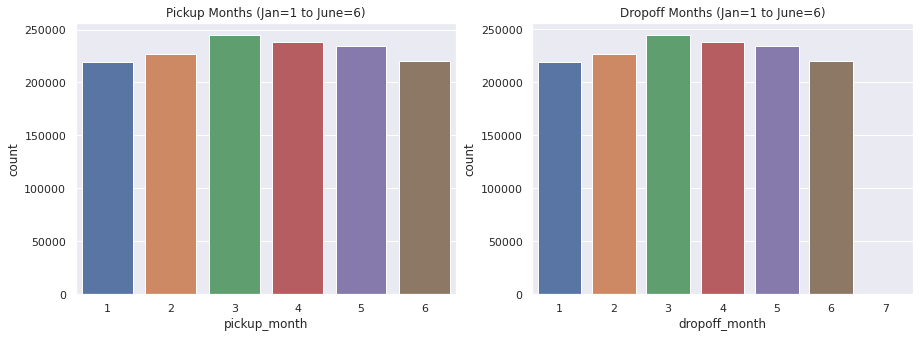

In [ ]:
#lets see pickup and dropoff count month wise
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,5))
ax1.set_title('Pickup Months (Jan=1 to June=6)')
ax=sns.countplot(x="pickup_month",data=df,ax=ax1)
ax2.set_title('Dropoff Months (Jan=1 to June=6)')
ax=sns.countplot(x="dropoff_month",data=df,ax=ax2)

There is not much difference in the number of trips across months.

###<b> 11.Latitude and longitude

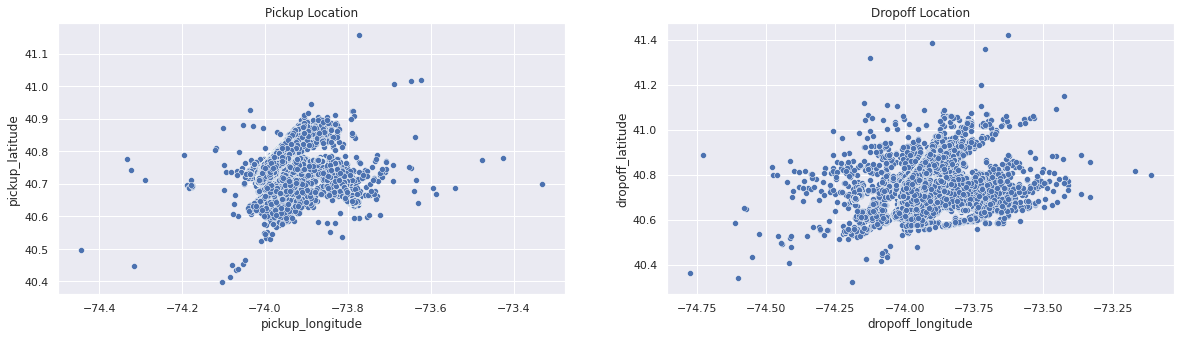

In [ ]:
#lets see pickup and dropoff location
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Location')
ax=sns.scatterplot(x=df.pickup_longitude,y=df.pickup_latitude,ax=ax3)
ax4.set_title('Dropoff Location')
ax=sns.scatterplot(x=df.dropoff_longitude,y=df.dropoff_latitude,ax=ax4)

##<b>Bivariate Analysis

###<b>1.Trip Duration per Vendor

<Figure size 720x360 with 0 Axes>

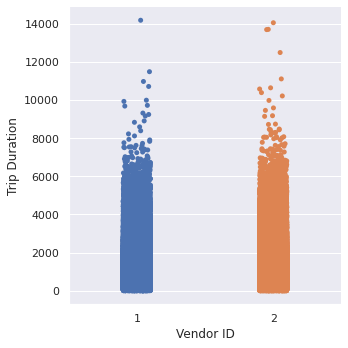

In [ ]:
#vendor v/s Trip duration
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration')
plt.show()

There is no difference beteen  vendor 1 and 2

###<b>2.Trip Duration per Store and Forward Flag

<Figure size 720x360 with 0 Axes>

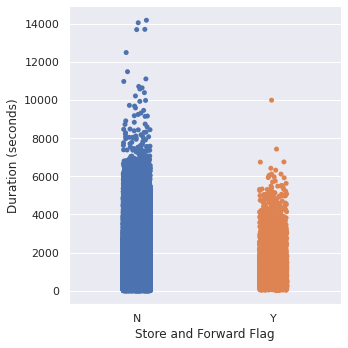

In [ ]:
#Trip Duration v/s Store and Forward Flagt
plt.figure(figsize = (10,5))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind='strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Duration (seconds)')
plt.show()

So from the above graph we can come to know that mostely long trips data havent store on server.

### <b>3.Trip Duration per hour

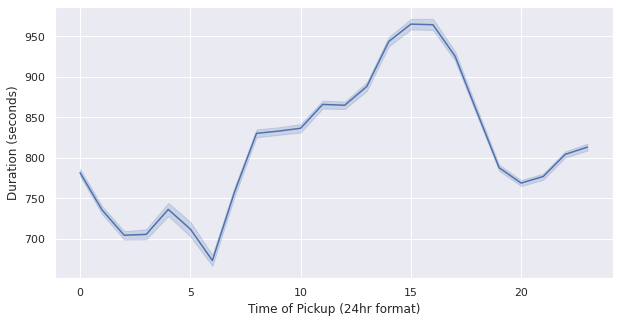

In [ ]:
#Plotting line chart of Trip Duration per hour
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

* We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
* Trip duration is the lowest around 6 am as streets may not be busy.

### <b>4.Trip duration per weekday

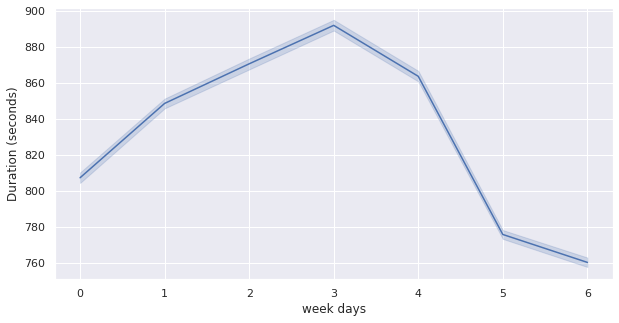

In [ ]:
#Plotting line chart of Trip duration per weekday
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_day_no',y='trip_duration',data = df)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

Trip duration on thursday is longest among all days.

### <b>5.Trip duration per month

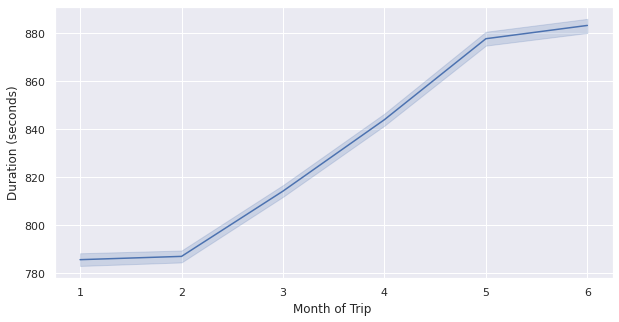

In [ ]:
#Plotting line chart of Trip duration per month
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='trip_duration', data = df)
plt.ylabel('Duration (seconds)')
plt.xlabel('Month of Trip ')
plt.show()

* From February, we can see trip duration rising every month.
* There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period.


### <b>6.Distance and Hour

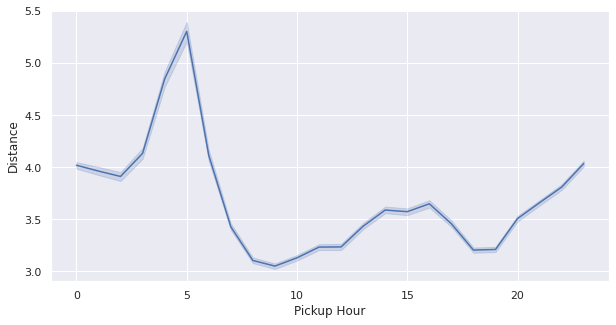

In [ ]:
# Plotting line chart of Distance and Hour
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.ylabel('Distance')
plt.xlabel('Pickup Hour')
plt.show()

* Trip distance is highest during early morning hours.
* It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
* It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.


### <B>7.Passenger_count and Trip Duration

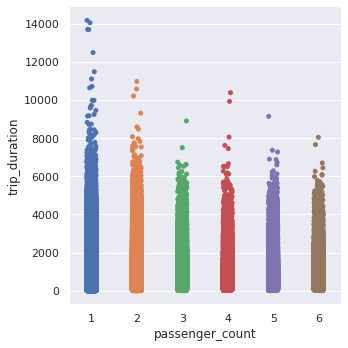

In [ ]:
#lets see trip duration for each passenger count
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip');

### <b>8.Distance and Trip Duration

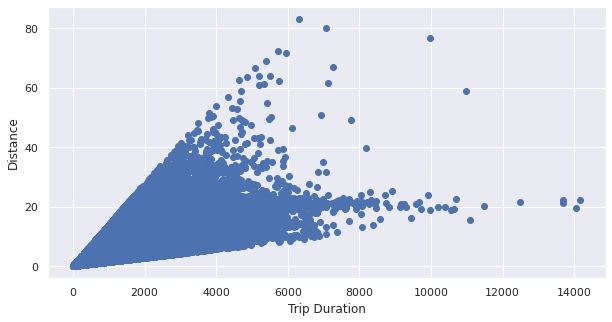

In [ ]:
#Scatter plot betweet distance and trip duration
plt.figure(figsize = (10,5))
plt.scatter(x='trip_duration', y='distance',data=df)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.show()


**9.Passenger_count and Distance**

In [ ]:
#lets see distance for each passenger count
sns.catplot(y='distance',x='passenger_count',data=nyc_taxi,kind='strip');

ValueError: ignored

One, two, or four passenger rides are used to travel some of the longer distances.

<b>10. Pickup_month and Distance

In [ ]:
# line graph between Distance and pickup month
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_month',y='distance',data= nyc_taxi);

Maximum distance travelled in the month of May

<b>11. Distance and Store and Forward Flag

In [ ]:
# Categorical plot between Distance and Store and Forward Flag
sns.catplot(y='distance',x='store_and_fwd_flag',data=nyc_taxi,kind='strip');

When data was not stored on the server, the distance travelled was greater.

<b>12. Distance and Vendor

In [ ]:
# Distance vs. vendor categorical plot
sns.catplot(y='distance',x='vendor_id',data=nyc_taxi,kind='strip');

#<b>Feature Engineering

**One Hot Encoding**

Dummify features like 'store_and_fwd_flag', and 'pickup_weekday'.

In [ ]:
df.head(2)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   

   dropoff_latitude store_and_fwd_flag  ...  dropoff_day_no pickup_hour  \
0         40.765602                  N  ...               0          17   
1         40.731152                  N  ...               6           0   

  dropoff_hour  pickup_month  dropoff_month  distance   direction      speed  \
0           17             3              3  1.498523   99.970196  11.856445   
1            0             6              6  1.805510 -117.153768   9.803673   

   pickup_timeofday  dropoff_timeofday  
0           Evening            Evening  
1        Late night         Late night  

[2 rows x 24 columns]

In [ ]:
df.head(2)

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   

   dropoff_latitude store_and_fwd_flag  ...  dropoff_day_no pickup_hour  \
0         40.765602                  N  ...               0          17   
1         40.731152                  N  ...               6           0   

  dropoff_hour  pickup_month  dropoff_month  distance   direction      speed  \
0           17             3              3  1.498523   99.970196  11.856445   
1            0             6              6  1.805510 -117.153768   9.803673   

   pickup_timeofday  dropoff_timeofday  
0           Evening            Evening  
1        Late night         Late night  

[2 rows x 24 columns]

#<b>Correlation Analysis

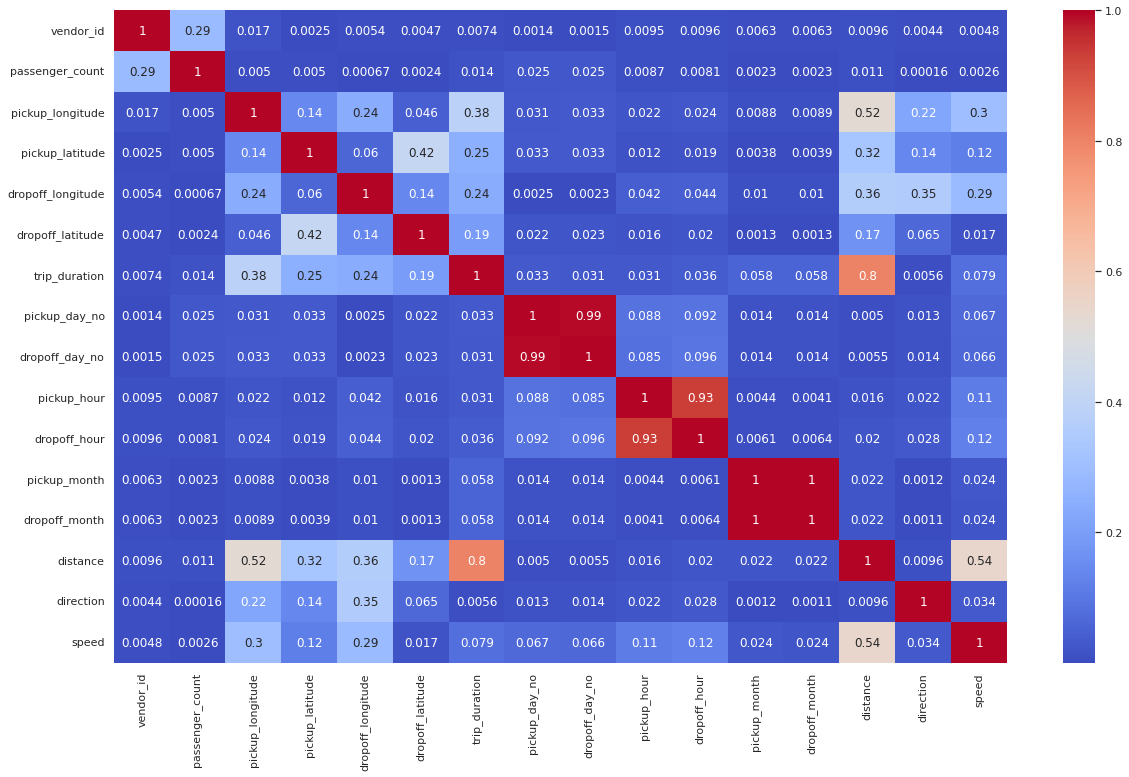

In [ ]:
# Let's look at the correlation graph after one hot encoding.
plt.figure(figsize=(20,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm');

In [ ]:
#To create the df corr dataframe, copy nyc taxi.
df_corr = df.copy()
df_corr.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'distance', 'direction', 'speed', 'pickup_timeofday',
       'dropoff_timeofday'],
      dtype='object')

#<b> Preparing dataset for modeling 

In [ ]:
independent_variables=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','distance', 'pickup_hour']

dependent_variables = 'trip_duration'

In [ ]:
# Create the data of independent variables
X = df_corr[independent_variables]

# Create the dependent variable data
y = df_corr[dependent_variables]

print(X.shape)
print(y.shape)

(1383652, 6)
(1383652,)


In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Transforming data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0:2]

array([[-0.23008645,  0.60322271,  0.24538584,  0.42465471, -0.51942707,
         0.52341616],
       [-0.18437968, -0.44317171, -0.73714885, -0.63980882, -0.44131507,
        -2.1114077 ]])

<b>Splitting the data in train and test sets

In [ ]:
#Importing RFE and Linear Regression 
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

Splited the selected data set in 65-35 split for training and testing purpose respectively

In [ ]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(899373, 6)
(899373,)


Test Data Shape
(484279, 6)
(484279,)


#<b> Regression Models

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##<b> 1) Linear Regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linear_reg =  LinearRegression()

#Aplly model on train dataset
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model score on train dataset
linear_reg.score(X_train, y_train)

0.6569938014844335

In [ ]:
#predicted value of train and test dataset
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)